### Data Exploration

In [1]:
# Importing necesarry libries
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer

In [2]:
# Load the dataset
df = pd.read_csv("card_transdata.csv")

In [3]:
# Display basic information about the dataset
print(df.info())

# Display descriptive statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB
None
       distance_from_home  distance_from_last_transaction  \
count      1000000.000000                  1000000.000000   
mean            26.628792                        5.036519   
std             65.390784     

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in the dataset:")
print(missing_values)

# Remove duplicate rows
df = df.drop_duplicates()

Missing values in the dataset:
distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64


### Modeling

### Preprocessing and Modeling (Random Forest Classifier)

In [5]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')  # You can choose 'mean', 'median', 'most_frequent', or other strategies
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Split the data
train_data, test_data = train_test_split(df_imputed, test_size=0.2, random_state=42)

# Specify features and target variable
X_train = train_data.drop("fraud", axis=1)
y_train = train_data["fraud"]

# Initialize a Random Forest Classifier
model = RandomForestClassifier()
# Train the model
model.fit(X_train, y_train)


RandomForestClassifier()

In [6]:
# Make predictions on the test set
X_test = test_data.drop("fraud", axis=1)
y_test = test_data["fraud"]
y_pred = model.predict(X_test)
rf_f1 = f1_score(y_test, y_pred, average='weighted')
print('Random Forest of F1 score is ==>', rf_f1)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

# Additional evaluation metrics
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Random Forest of F1 score is ==> 0.999989999740724
Random Forest Accuracy: 1.00
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182557
         1.0       1.00      1.00      1.00     17443

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000

[[182557      0]
 [     2  17441]]


### Confusion Matrix for Random Forest Classifier

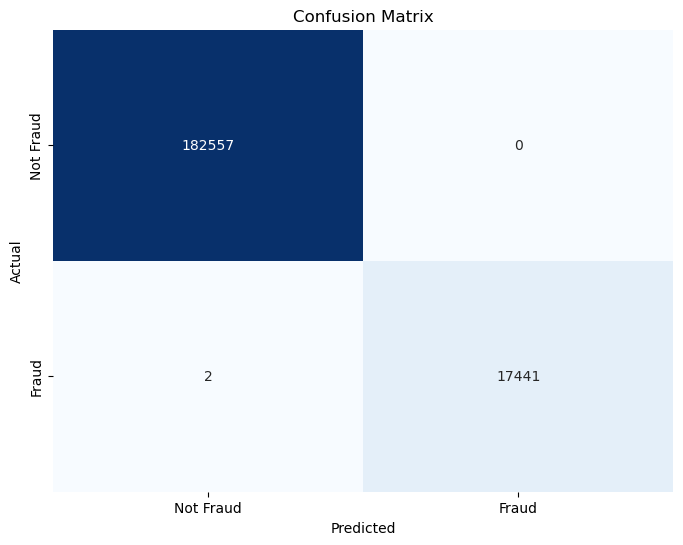

In [7]:
# Calculate confusion matrix for RF
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


True Positives (TP): 17,441
Instances that are actually positive (fraud) and were correctly predicted as positive. 

True Negatives (TN): 182,557
Instances that are actually negative (not fraud) and were correctly predicted as negative.

False Positives (FP): 0
Instances that are actually negative but were incorrectly predicted as positive. 

False Negatives (FN): 2
Instances that are actually positive but were incorrectly predicted as negative.

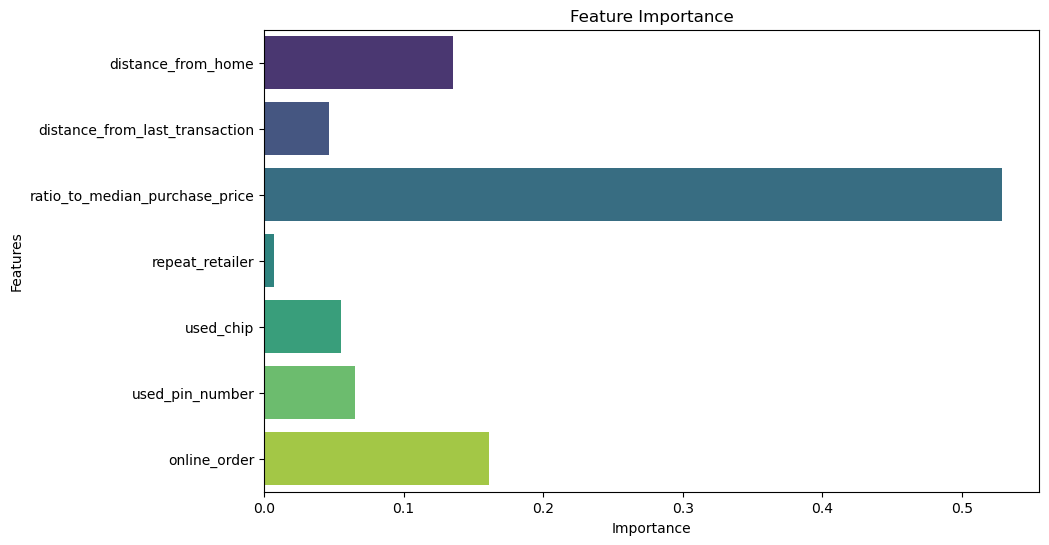

In [8]:
# Assuming model is a trained RandomForestClassifier
feature_importance = model.feature_importances_

# Create a bar plot for feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=X_train.columns, orient='h', palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

The resulting bar plot visually represents the importance of each feature in the RandomForestClassifier model. Features with higher importance contribute more to the model's predictions. This information can be useful for feature selection, understanding which features are driving the model's decisions, and identifying key factors in the dataset.

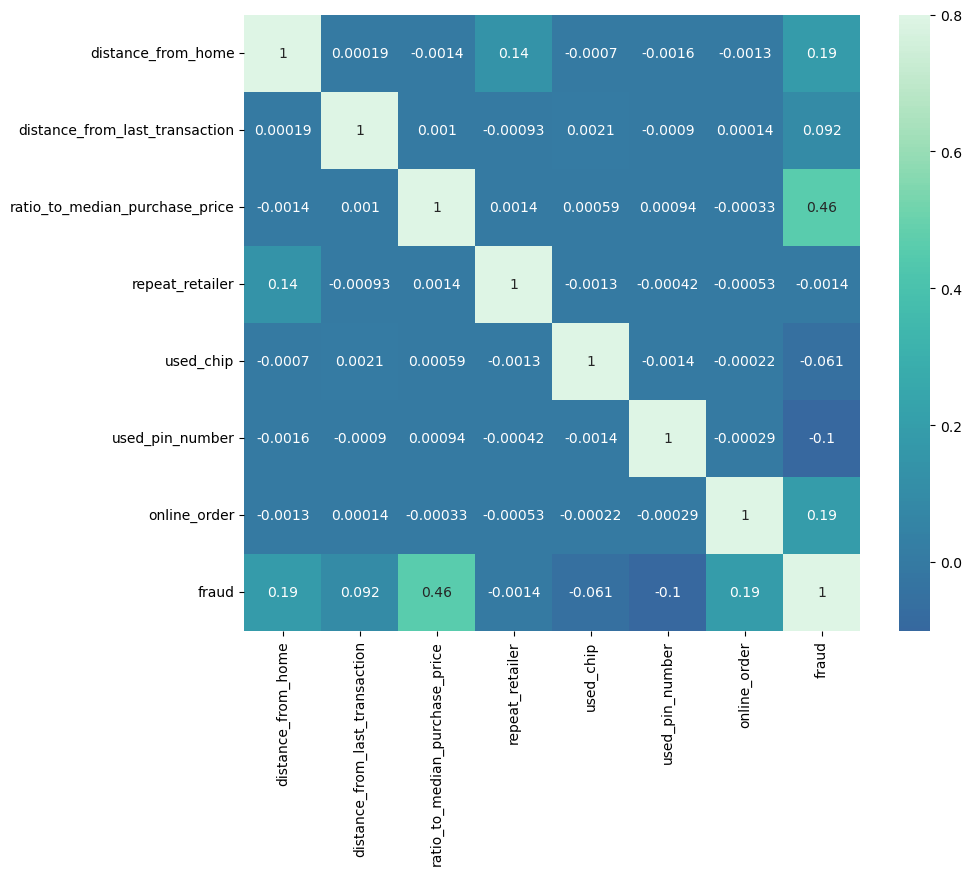

In [25]:
# Correlation matrix
corrmat = df.corr()
fig = plt.figure(figsize = (10, 8))

sns.heatmap(corrmat, vmax = .8, square = True, annot = True, cmap = 'mako', center = 0)
plt.show()

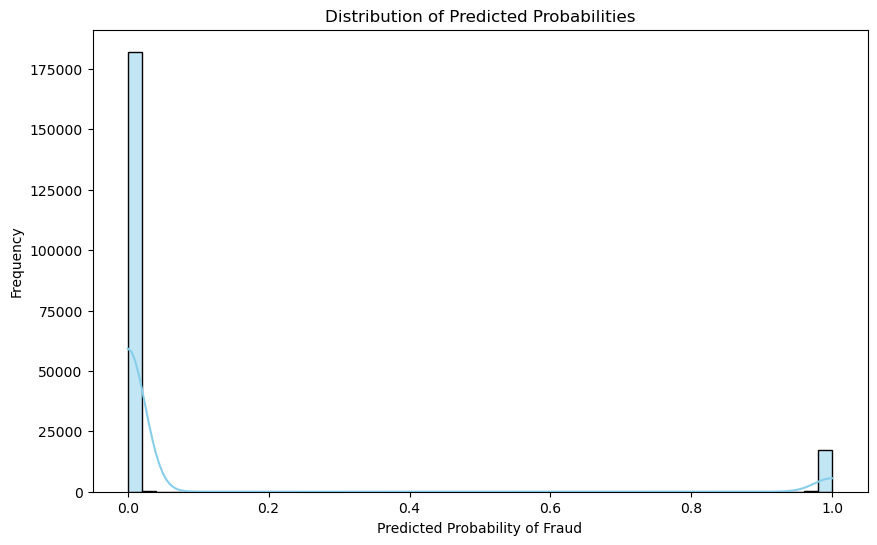

In [9]:
# Plot the distribution of predicted probabilities
plt.figure(figsize=(10, 6))
sns.histplot(model.predict_proba(X_test)[:, 1], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability of Fraud')
plt.ylabel('Frequency')
plt.show()


The histogram allows us to visualize the distribution of predicted probabilities across different ranges, providing insights into how confident the model is in its predictions for various instances in the test set. More in detail, The presence of high probabilities on the right side of the histogram suggests instances where the model is confident in predicting fraud, while the left side represents instances where the model is less confident

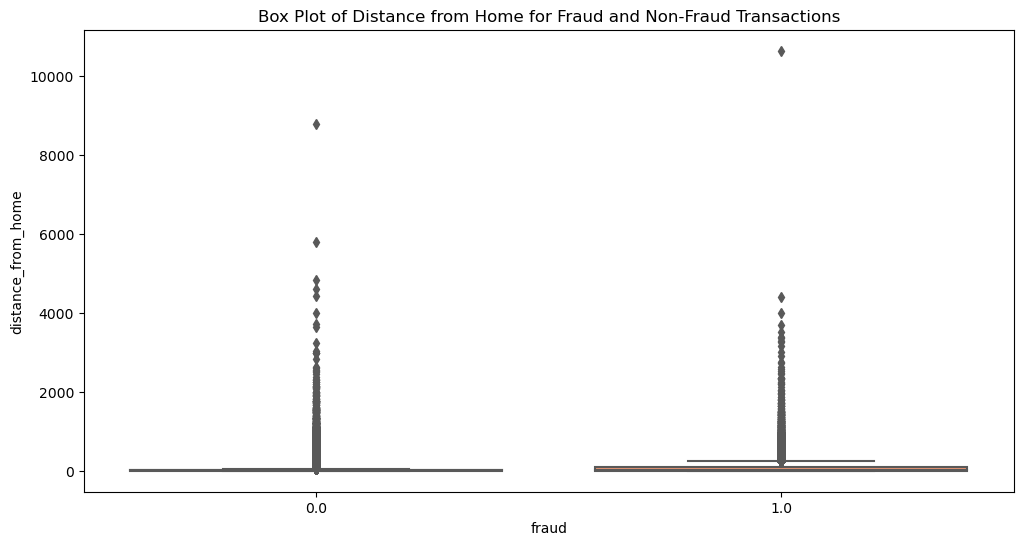

In [10]:
# Box plot for selected features
selected_features = ['distance_from_home', 'distance_from_last_transaction']
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='fraud', y='distance_from_home', palette='Set2')
plt.title('Box Plot of Distance from Home for Fraud and Non-Fraud Transactions')
plt.show()


In [11]:
X = df.drop("fraud", axis=1)
y = df["fraud"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Isolation Forest Model
isolation_forest_model = IsolationForest(contamination=0.01, random_state=42)
isolation_forest_model.fit(X_train)

IsolationForest(contamination=0.01, random_state=42)

In [12]:
# Predict anomalies (outliers)
y_pred_anomalies = isolation_forest_model.predict(X_test)

# Convert predictions to binary labels (1 for normal, -1 for anomalies)
y_pred_anomalies_binary = [1 if pred == 1 else 0 for pred in y_pred_anomalies]

# Evaluate the Isolation Forest model
isolation_forest_f1 = f1_score(y_test, y_pred_anomalies, average='weighted')
print('Isolation Forest of F1 score is ==>', isolation_forest_f1)
accuracy_anomalies = accuracy_score(y_test, y_pred_anomalies_binary)
print(f"Isolation Forest Accuracy: {accuracy_anomalies:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred_anomalies_binary))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_anomalies_binary))


Isolation Forest of F1 score is ==> 0.013704780396071784
Isolation Forest Accuracy: 0.09
Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.01      0.02    182557
         1.0       0.09      0.97      0.16     17443

    accuracy                           0.09    200000
   macro avg       0.42      0.49      0.09    200000
weighted avg       0.69      0.09      0.03    200000

Confusion Matrix:
[[  1556 181001]
 [   522  16921]]


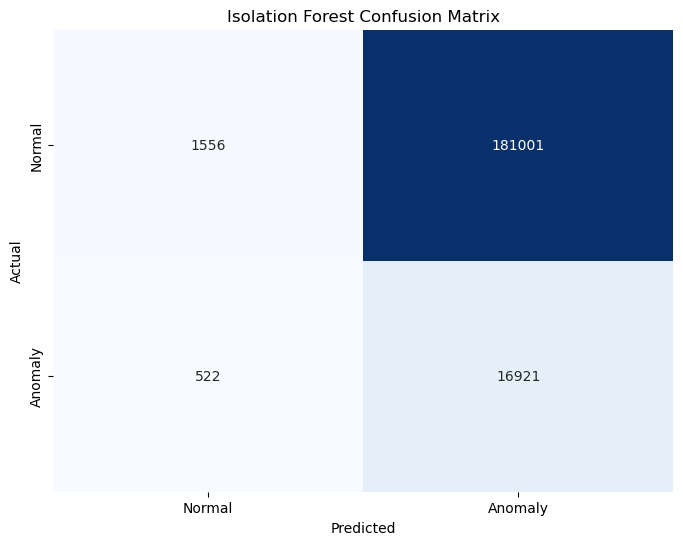

In [26]:
# Confusion Matrix for Isolation Forest
cm_anomalies = confusion_matrix(y_test, y_pred_anomalies_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_anomalies, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Normal', 'Anomaly'],
            yticklabels=['Normal', 'Anomaly'])
plt.title('Isolation Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Local Outlier Factor Algorithm

In [14]:
X = df.drop("fraud", axis=1)
y = df["fraud"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Local Outlier Factor Model
lof_model = LocalOutlierFactor(contamination=0.01)
lof_pred = lof_model.fit_predict(X_test)

In [15]:
# Convert predictions to binary labels (1 for normal, -1 for anomalies)
lof_pred_binary = [1 if pred == 1 else 0 for pred in lof_pred]

# Evaluate the LOF model
lof_f1 = f1_score(y_test, lof_pred, average='weighted')
print('Local Outlier Factor of F1 score is ==>', lof_f1)

accuracy_lof = accuracy_score(y_test, lof_pred_binary)
print(f"Local Outlier Factor Accuracy: {accuracy_lof:.2f}")

print("Classification Report:")
print(classification_report(y_test, lof_pred_binary))

print("Confusion Matrix:")
print(confusion_matrix(y_test, lof_pred_binary))

Local Outlier Factor of F1 score is ==> 0.013667433288619265
Local Outlier Factor Accuracy: 0.09
Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.01      0.02    182557
         1.0       0.09      0.97      0.16     17443

    accuracy                           0.09    200000
   macro avg       0.40      0.49      0.09    200000
weighted avg       0.66      0.09      0.03    200000

Confusion Matrix:
[[  1438 181119]
 [   562  16881]]


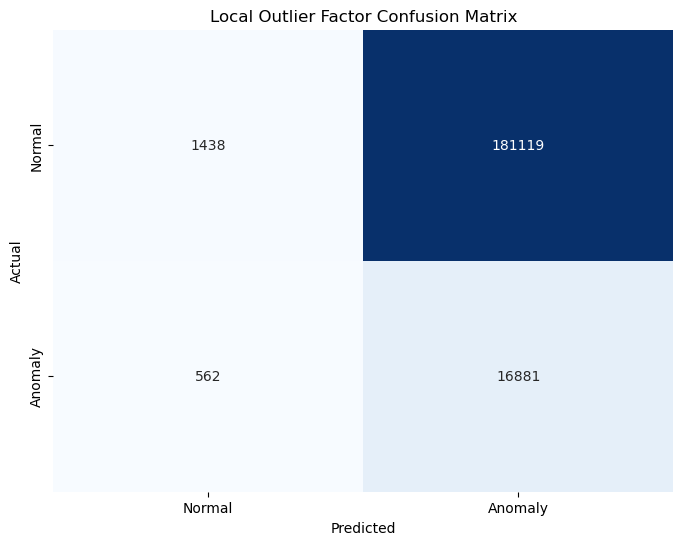

'True Negative (TN): 1438\n\nInstances that are actually non-fraud (class 0), and the model correctly predicted them as non-fraud.\n\nFalse Positive (FP): 181119\nInstances that are actually non-fraud (class 0), but the model incorrectly predicted them as fraud.\n\nFalse Negative (FN): 562\nInstances that are actually fraud (class 1), but the model incorrectly predicted them as non-fraud.\n\nTrue Positive (TP): 16881\nInstances that are actually fraud (class 1), and the model correctly predicted them as fraud.'

In [22]:
# Confusion Matrix for LOF
cm_lof= confusion_matrix(y_test, lof_pred_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lof, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Normal', 'Anomaly'],
            yticklabels=['Normal', 'Anomaly'])
plt.title('Local Outlier Factor Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

"""True Negative (TN): 1438
Instances that are actually non-fraud (class 0), and the model correctly predicted them as non-fraud.

False Positive (FP): 181119
Instances that are actually non-fraud (class 0), but the model incorrectly predicted them as fraud.

False Negative (FN): 562
Instances that are actually fraud (class 1), but the model incorrectly predicted them as non-fraud.

True Positive (TP): 16881
Instances that are actually fraud (class 1), and the model correctly predicted them as fraud."""

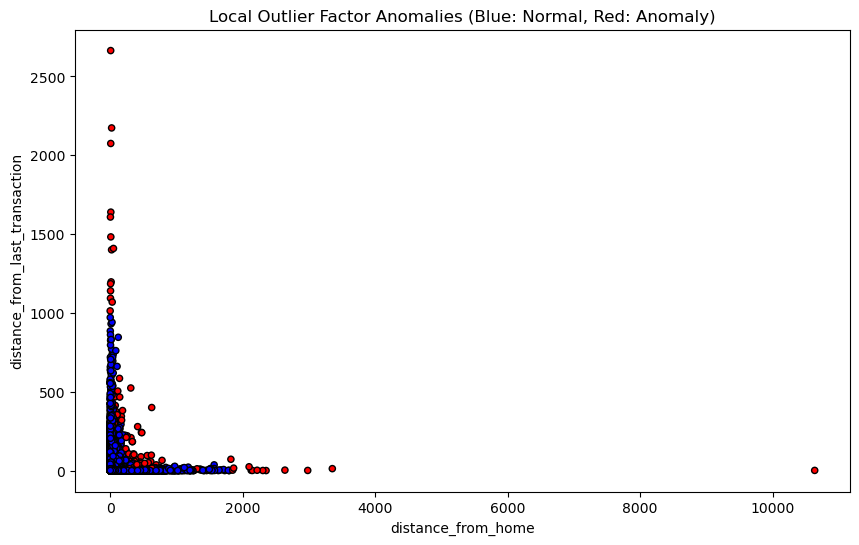

In [17]:
# Create a scatter plot for anomalies
plt.figure(figsize=(10, 6))
colors = ['blue' if label == 1 else 'red' for label in lof_pred_binary]
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=colors, s=20, edgecolors='k')
plt.title('Local Outlier Factor Anomalies (Blue: Normal, Red: Anomaly)')
plt.xlabel('distance_from_home')
plt.ylabel('distance_from_last_transaction')
plt.show()

### Hyperparameter optimization of each model

In [18]:
# have laready X_train, X_test, y_train, y_test defined

# 1. Hyperparameter Optimization for Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Define the F1 scorer for GridSearchCV
f1_scorer = make_scorer(f1_score, pos_label=1)

# Create GridSearchCV object
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, scoring=f1_scorer, cv=3, n_jobs=-1)

# Fit the grid search to the data
rf_grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_rf_params = rf_grid_search.best_params_
best_rf_model = rf_grid_search.best_estimator_

# Print the best parameters
print("Best Random Forest Parameters:")
print(best_rf_params)

Best Random Forest Parameters:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [19]:
# 2. Hyperparameter Optimization for Isolation Forest
isolation_forest_model = IsolationForest(random_state=42, contamination=0.01)

# Define the parameter grid
isolation_forest_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_samples': ['auto', 100, 200],
    'contamination': [0.01, 0.05, 0.1]
}

# Create GridSearchCV object
isolation_forest_grid_search = GridSearchCV(isolation_forest_model, isolation_forest_param_grid, scoring=f1_scorer, cv=5, n_jobs=-1)

# Fit the grid search to the data
isolation_forest_grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_isolation_forest_params = isolation_forest_grid_search.best_params_
best_isolation_forest_model = isolation_forest_grid_search.best_estimator_

# Print the best parameters
print("\nBest Isolation Forest Parameters:")
print(best_isolation_forest_params)

C:\Users\makno\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(



Best Isolation Forest Parameters:
{'contamination': 0.01, 'max_samples': 'auto', 'n_estimators': 50}


For Local Outlier Factor, hyperparameter tuning is not applicable as it is not a trainable model with tunable hyperparameters.

### Compare Models (Final Evaluation)

In [20]:
best_isolation_forest_model = IsolationForest(**isolation_forest_grid_search.best_params_)
best_rf_model = RandomForestClassifier(**rf_grid_search.best_params_)

# Train final models
best_isolation_forest_model.fit(X_train, y_train)
best_rf_model.fit(X_train, y_train)

# Evaluate on the testing set
y_pred_anomalies = best_isolation_forest_model.predict(X_test) #Isolation Forest Model
y_pred = best_rf_model.predict(X_test) # Random Forest Model


# Evaluate F1 scores on the testing set
isolation_forest_f1 = f1_score(y_test, y_pred_anomalies, average='micro')
rf_f1 = f1_score(y_test, y_pred, average='micro')
lof_f1 = f1_score(y_test, lof_pred, average='micro')

# Compare the F1 scores and choose the best model
best_model = max([(isolation_forest_f1, 'Isolation Forest'), (rf_f1, 'Random Forest'), (lof_f1, 'Local Outlier Factor')])

print(f"The best model is {best_model[1]} with an F1 score of {best_model[0]} on the testing set.")


The best model is Random Forest with an F1 score of 0.99999 on the testing set.
